## Importing Libraries

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading & Exploration

In [2]:
# Reading the two datasets
df1 = pd.read_csv("netflix_main.csv")
df2 = pd.read_csv("netflix_ratings.csv")

# Merging the two datasets
netflix_df = df1.merge(df2, on='show_id', how='inner')
netflix_df.head() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,viewer_rating,rating_count
0,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",4.5,643
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,4.3,1205
2,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",3.9,2524
3,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,4.8,298
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,4.1,23320


## Data Structure

In [4]:
# Dataset columns
netflix_df.columns

# Formatting the Column names
netflix_df.columns = netflix_df.columns.str.title()

In [5]:
# Checking the number of rows and columns
netflix_df.shape

(7715, 14)

In [7]:
# Description of the data
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7715 entries, 0 to 7714
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Show_Id        7715 non-null   object
 1   Type           7715 non-null   object
 2   Title          7715 non-null   object
 3   Director       5409 non-null   object
 4   Cast           6983 non-null   object
 5   Country        6993 non-null   object
 6   Date_Added     7706 non-null   object
 7   Release_Year   7715 non-null   int64 
 8   Rating         7712 non-null   object
 9   Duration       7713 non-null   object
 10  Listed_In      7715 non-null   object
 11  Description    7715 non-null   object
 12  Viewer_Rating  7715 non-null   object
 13  Rating_Count   7715 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 904.1+ KB


In [8]:
# unique values
netflix_df.nunique()

Show_Id          7715
Type                2
Title            7715
Director         4066
Cast             6754
Country           685
Date_Added       1640
Release_Year       74
Rating             16
Duration          215
Listed_In         502
Description      7692
Viewer_Rating     228
Rating_Count     5238
dtype: int64

## Data Cleaning and Wrangling

In [9]:
# Finding the Missing Values
netflix_df.isna().sum()

Show_Id             0
Type                0
Title               0
Director         2306
Cast              732
Country           722
Date_Added          9
Release_Year        0
Rating              3
Duration            2
Listed_In           0
Description         0
Viewer_Rating       0
Rating_Count        0
dtype: int64

In [10]:
# Filling the Nan Values in columns Director, Cast and Country
netflix_df['Director'] = netflix_df['Director'].ffill()
netflix_df['Cast'] = netflix_df['Cast'].fillna('Unknown')
netflix_df['Country'] = netflix_df['Country'].ffill()

In [11]:
# Dropping the nan values in columns Date_Added, Duration, and Rating
netflix_df = netflix_df.dropna(subset=['Date_Added', 'Duration', 'Rating'])

In [12]:
# Checkin the Duplicate Values
netflix_df.duplicated().sum()

0

In [13]:
# Formatting the date and year columns
netflix_df["Date_Added"] = pd.to_datetime(netflix_df['Date_Added'])

## Data Analysis & Visualization

In [14]:
# Statistical Description
netflix_df.describe()

,Release_Year,Rating_Count
count,7701.000000,7701.000000
mean,2014.167121,4975.353590
std,8.868856,6365.196239
min,1925.000000,46.000000
25%,2013.000000,1514.000000
50%,2017.000000,2964.000000
75%,2019.000000,5914.000000
max,2021.000000,101956.000000


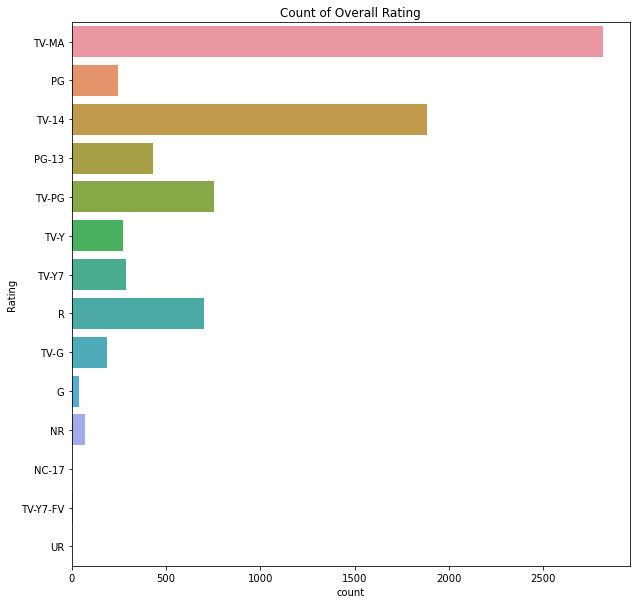

In [15]:
# plot of the proportion of the overall rating
sns.countplot(y = 'Rating', data=netflix_df)
plt.title('Count of Overall Rating')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

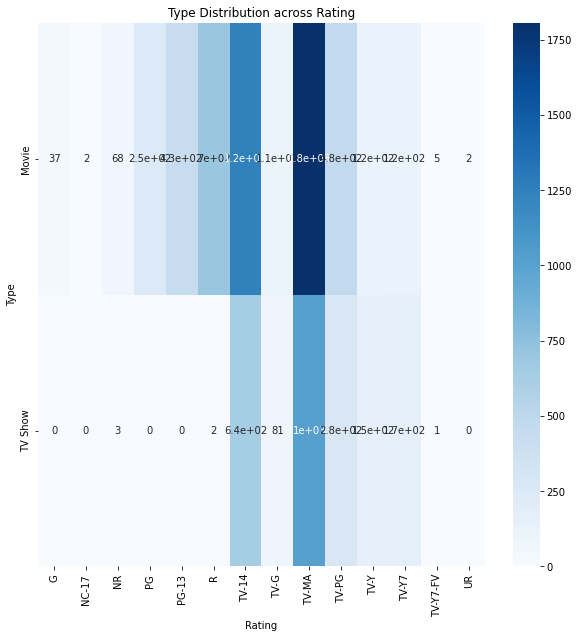

In [16]:
# Distribution of type across rating
ct = pd.crosstab(netflix_df['Type'], netflix_df['Rating'])
sns.heatmap(ct, annot=True, cmap='Blues')
plt.title('Type Distribution across Rating')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

### Time Series Analysis

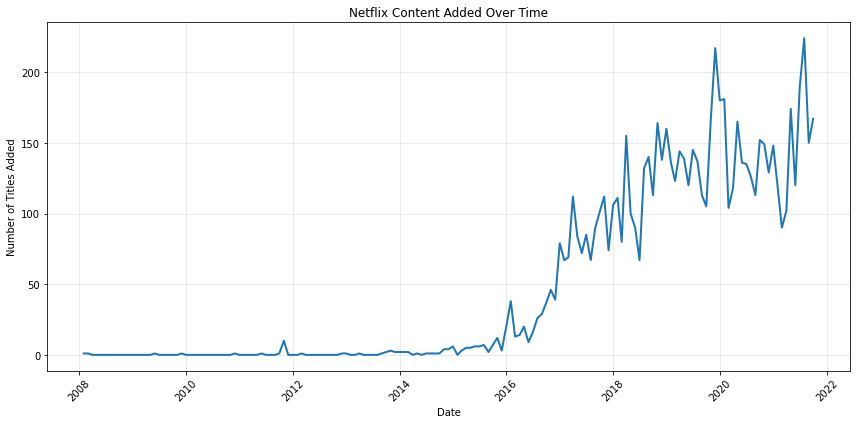

In [17]:
monthly_additions = netflix_df.groupby(pd.Grouper(key='Date_Added', freq='M')).size()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_additions.index, monthly_additions.values, linewidth=2)
plt.title('Netflix Content Added Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Titles Added')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Print some basic statistics
print(f"Total titles in dataset: {len(netflix_df)}")
print(f"Time period covered: {monthly_additions.index.min()} to {monthly_additions.index.max()}")
print(f"Average titles added per month: {monthly_additions.mean():.1f}")
print(f"Busiest month: {monthly_additions.idxmax()} with {monthly_additions.max()} titles")

Total titles in dataset: 7701
Time period covered: 2008-01-31 00:00:00 to 2021-09-30 00:00:00
Average titles added per month: 46.7
Busiest month: 2021-07-31 00:00:00 with 224 titles


### Movies vs TV Shows over Time

In [19]:
# Separate Movies and TV Shows
netflix_df['Type'] = netflix_df['Type'].str.upper()  # Standardize case

# Count by month for each type
monthly_movies = netflix_df[netflix_df['Type'] == 'MOVIE'].groupby(
pd.Grouper(key='Date_Added', freq='M')).size()
monthly_tv = netflix_df[netflix_df['Type'] == 'TV SHOW'].groupby(
pd.Grouper(key='Date_Added', freq='M')).size()

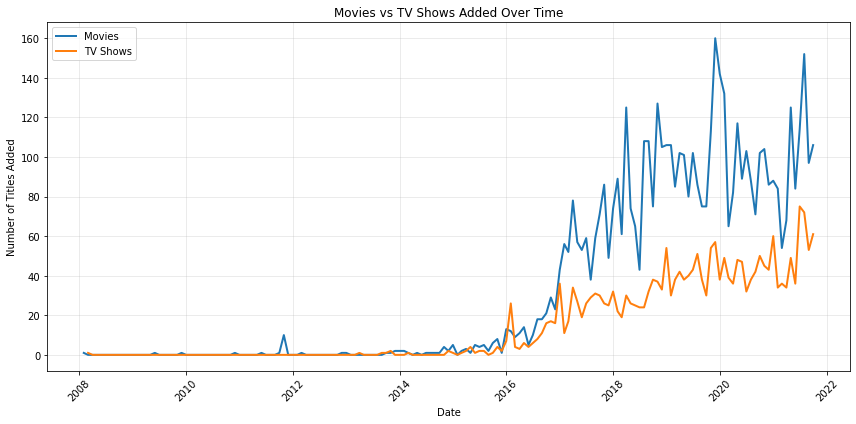

In [20]:
# Plot both
plt.figure(figsize=(12, 6))
plt.plot(monthly_movies.index, monthly_movies.values, label='Movies', linewidth=2)
plt.plot(monthly_tv.index, monthly_tv.values, label='TV Shows', linewidth=2)
plt.title('Movies vs TV Shows Added Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Titles Added')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Analysis

In [21]:
# First, let's see what numerical columns we have
print("Numerical columns available:")
print(netflix_df.select_dtypes(include=['int64', 'float64']).columns.tolist())

Numerical columns available:
['Release_Year', 'Rating_Count']


In [22]:
# Select only numerical columns for correlation
numerical_df = netflix_df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

print("CORRELATION MATRIX:")
print(correlation_matrix)

CORRELATION MATRIX:
              Release_Year  Rating_Count
Release_Year      1.000000      0.006275
Rating_Count      0.006275      1.000000



CORRELATIONS WITH RATING COUNT:
Rating_Count    1.000000
Release_Year    0.006275
Name: Rating_Count, dtype: float64


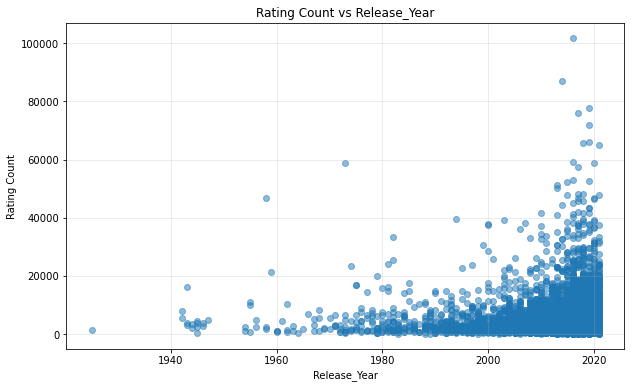

In [23]:
# Let's look at correlations with rating count specifically
print("\nCORRELATIONS WITH RATING COUNT:")
rating_correlations = correlation_matrix['Rating_Count'].sort_values(ascending=False)
print(rating_correlations)

# Simple scatter plot to visualize the strongest correlation
plt.figure(figsize=(10, 6))

# Find the feature most correlated with Rating (excluding itself)
strongest_corr = rating_correlations.index[1]  # index[0] is Viewer_Rating itself

plt.scatter(netflix_df[strongest_corr], netflix_df['Rating_Count'], alpha=0.5)
plt.xlabel(strongest_corr)
plt.ylabel('Rating Count')
plt.title(f'Rating Count vs {strongest_corr}')
plt.grid(True, alpha=0.3)
plt.show()

### Global Analysis

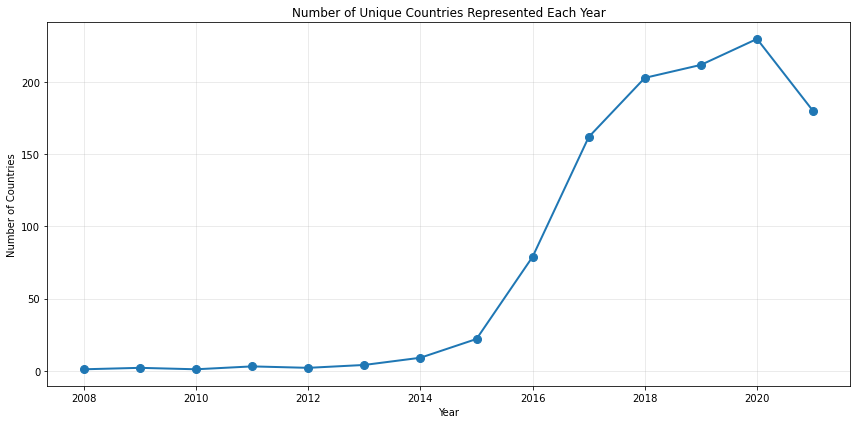

Countries represented by year:
Year_Added
2008      1
2009      2
2010      1
2011      3
2012      2
2013      4
2014      9
2015     22
2016     79
2017    162
2018    203
2019    212
2020    230
2021    180
Name: Country, dtype: int64


In [24]:
# Track Country diversity overtime
# Count unique countries by year
netflix_df['Year_Added'] = netflix_df['Date_Added'].dt.year
countries_by_year = netflix_df.groupby('Year_Added')['Country'].nunique()

# Plot the results
plt.figure(figsize=(12, 6))
countries_by_year.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Number of Unique Countries Represented Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Countries represented by year:")
print(countries_by_year)

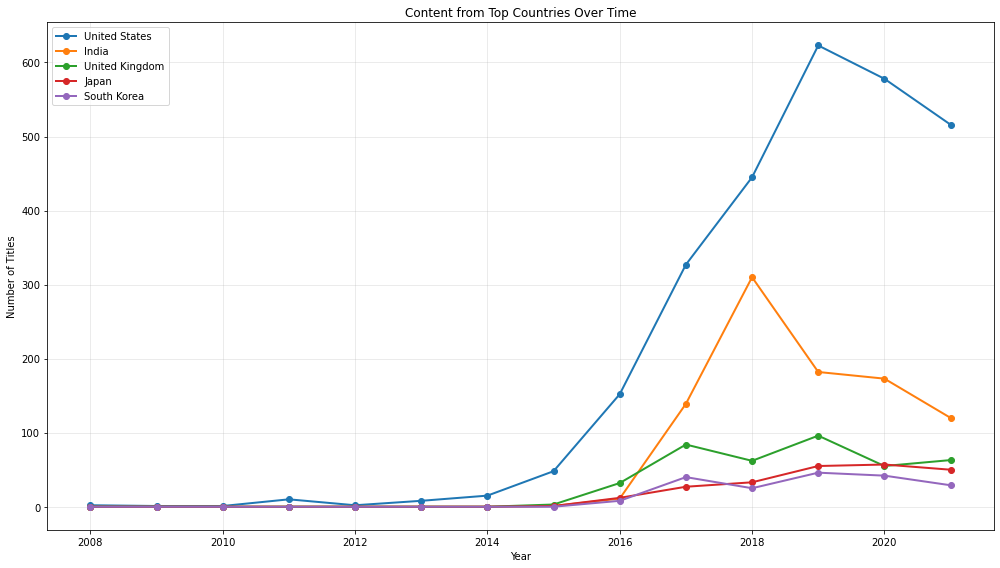

In [25]:
# Track top 5 countries over time
top_countries = netflix_df['Country'].value_counts().head(5).index.tolist()

# Create a pivot table showing count of content from top countries by year
country_trends = netflix_df[netflix_df['Country'].isin(top_countries)].pivot_table(
    index='Year_Added', 
    columns='Country', 
    values='Show_Id', 
    aggfunc='count'
).fillna(0)

# Plot the trends
plt.figure(figsize=(14, 8))
for country in top_countries:
    plt.plot(country_trends.index, country_trends[country], label=country, linewidth=2, marker='o')

plt.title('Content from Top Countries Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Netflix Directors WordCloud Analysis

In [26]:
from wordcloud import WordCloud

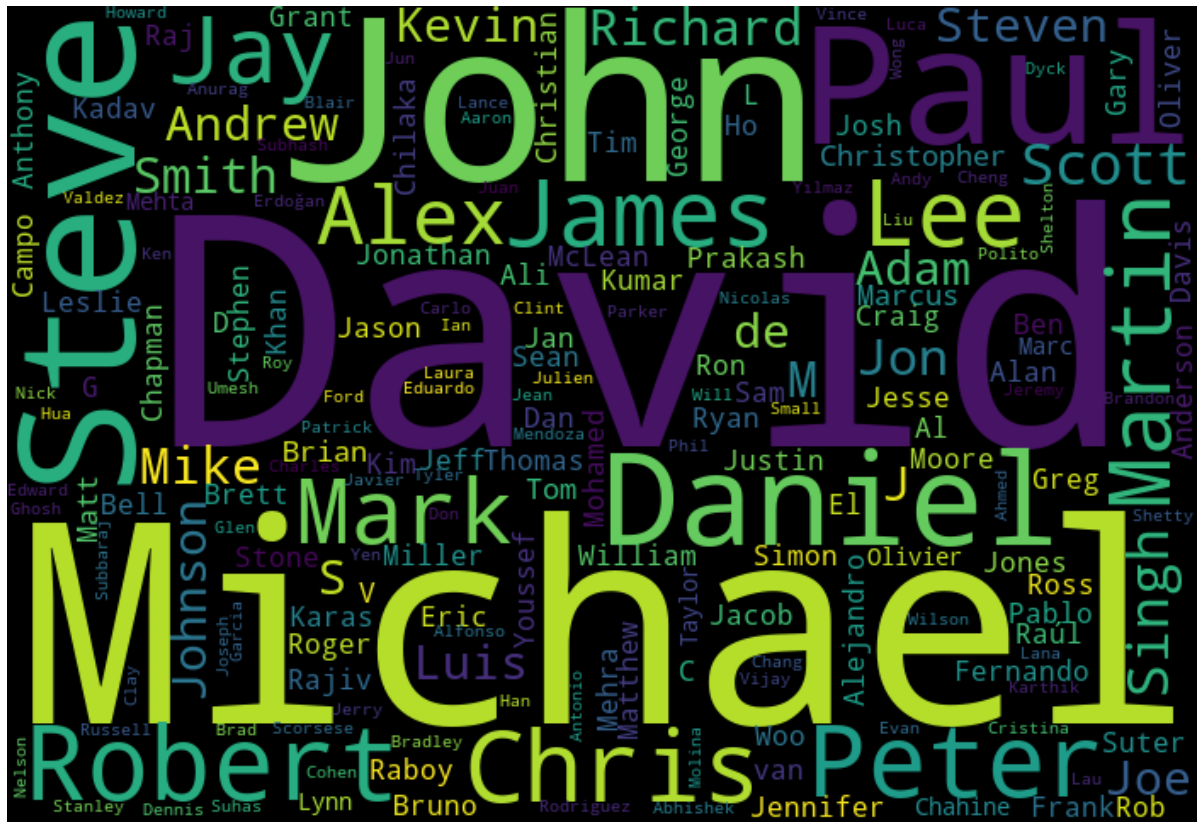

In [27]:
# Analyzing the distribution of Directorsin Netflix Titles
df = ','.join(map(str, netflix_df['Director'].values))
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(background_color='black', width=700, height=480, margin=0, collocations=False)
for sw in stopwords:    
    wrd.stopwords.add(sw)
    wordcloud = wrd.generate(df)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

### Genre Analysis

In [29]:
# Cluster based on genres (simplified approach)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Create binary features for top genres
top_genres = ['Drama', 'Comedy', 'Action', 'Documentary', 'International', 'Romance', 'Thriller']

# Create genre flags
for genre in top_genres:
    netflix_df[f'Genre_{genre}'] = netflix_df['Listed_In'].str.contains(genre, na=False).astype(int)

# Select genre columns for clustering
genre_columns = [f'Genre_{genre}' for genre in top_genres]
genre_features = netflix_df[genre_columns].dropna()

# Apply clustering
kmeans_genres = KMeans(n_clusters=4, random_state=42)
genre_clusters = kmeans_genres.fit_predict(genre_features)

# Add to dataframe
netflix_df['Genre_Cluster'] = genre_clusters

# Analyze what each genre cluster represents
cluster_genre_profiles = netflix_df.groupby('Genre_Cluster')[genre_columns].mean()

print("Genre Cluster Profiles (average genre presence):")
cluster_genre_profiles.round(2)

Genre Cluster Profiles (average genre presence):


,Genre_Drama,Genre_Comedy,Genre_Action,Genre_Documentary,Genre_International,Genre_Romance,Genre_Thriller
Genre_Cluster,,,,,,,
0,1.0,0.00,0.08,0.0,1.0,0.0,0.07
1,0.0,0.11,0.12,0.0,0.0,0.0,0.06
2,0.0,0.01,0.15,0.0,1.0,0.0,0.07
3,1.0,0.00,0.11,0.0,0.0,0.0,0.12
